<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Kaggle_obesity_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Your Goal: The goal of this competition is to use various factors
# to predict obesity risk in individuals, which is related to cardiovascular disease.
# Good luck!

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df_train = pd.read_csv('/content/obesity_risk_data/train.csv')
df_test = pd.read_csv('/content/obesity_risk_data/test.csv')
# df_test = pd.read_csv('/content/obesity_risk_data/sample_submission.csv')

print(f'The train dataset has {df_train.shape[0]}, the testset has {df_test.shape[0]}')

The train dataset has 20758, the testset has 13840


In [17]:
display('Train:', df_train.head(10))
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [18]:
df_train.describe().to_csv('output.csv', index=False)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [21]:
from tabulate import tabulate
data = [
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily"],
    ["CALC", "Consumption of alcohol"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time using technology devices"],
    ["MTRANS", "Transportation used"]
]
headers = ["Abbreviation", "Full Form"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |


In [22]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [23]:
summary(df_train.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


In [24]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


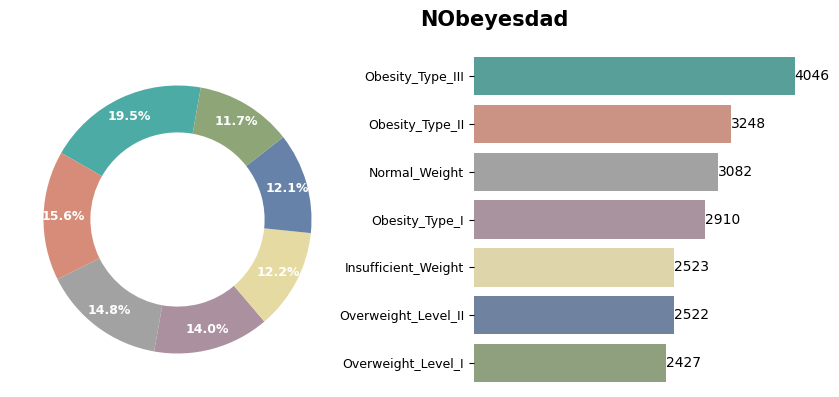

In [30]:
showplot("NObeyesdad")

In [31]:
df = pd.DataFrame(df_train.describe(include='all').transpose())
df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


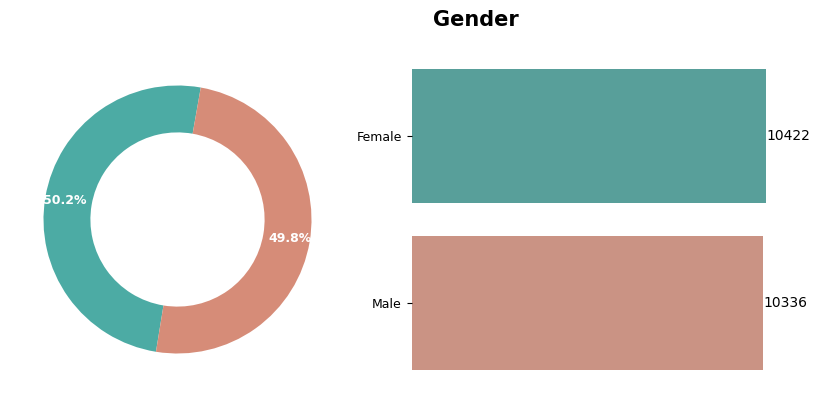

In [32]:
showplot('Gender')

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


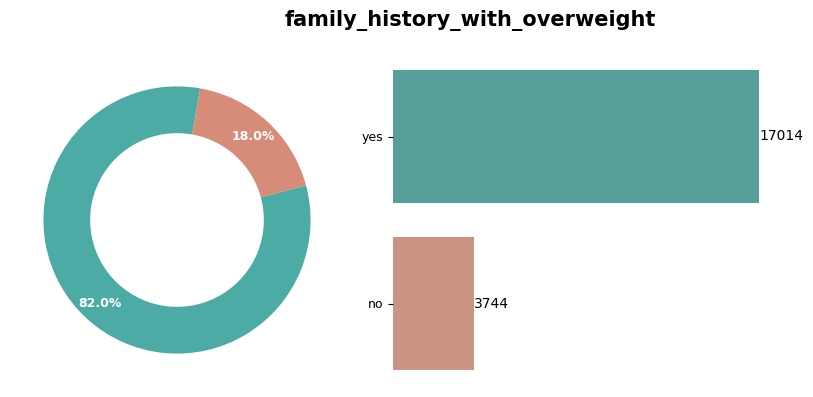

In [34]:
showplot("family_history_with_overweight")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


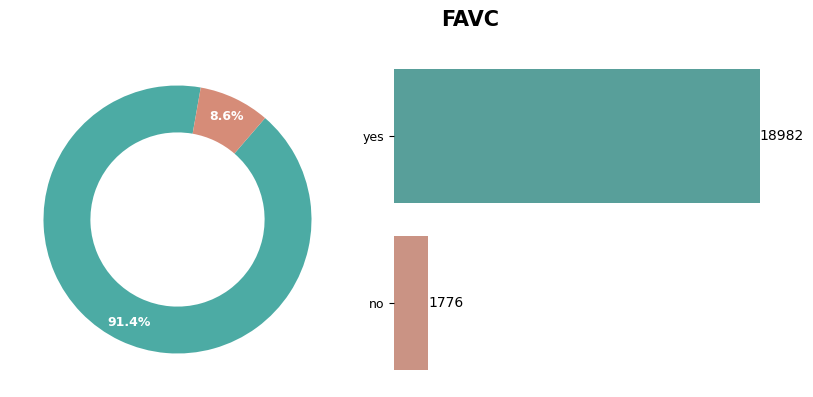

In [35]:
showplot("FAVC")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


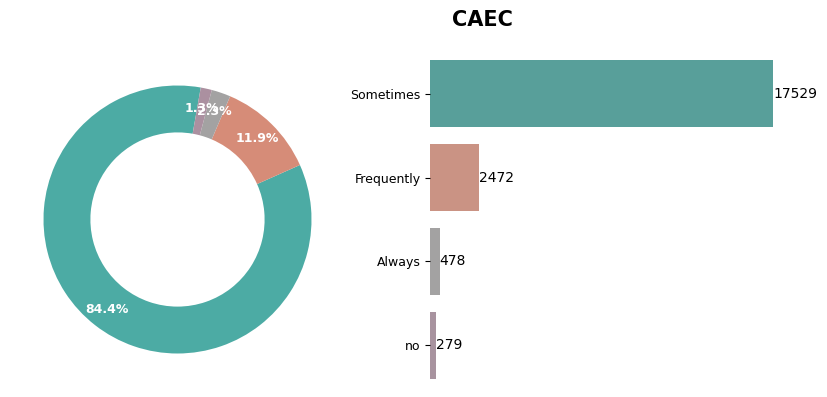

In [36]:
showplot("CAEC")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


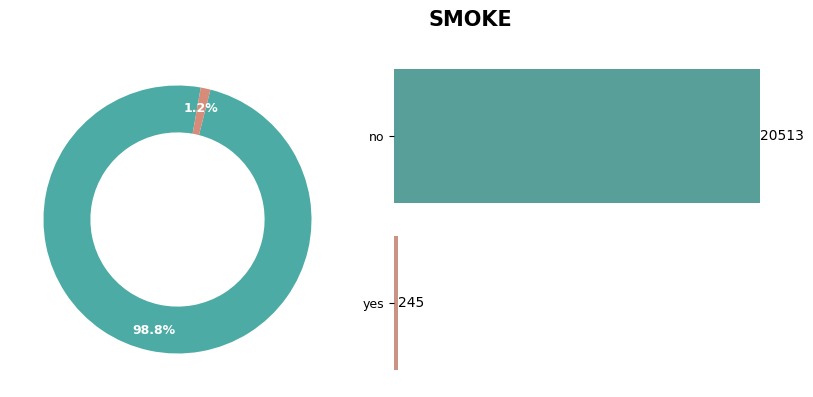

In [37]:
showplot("SMOKE")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


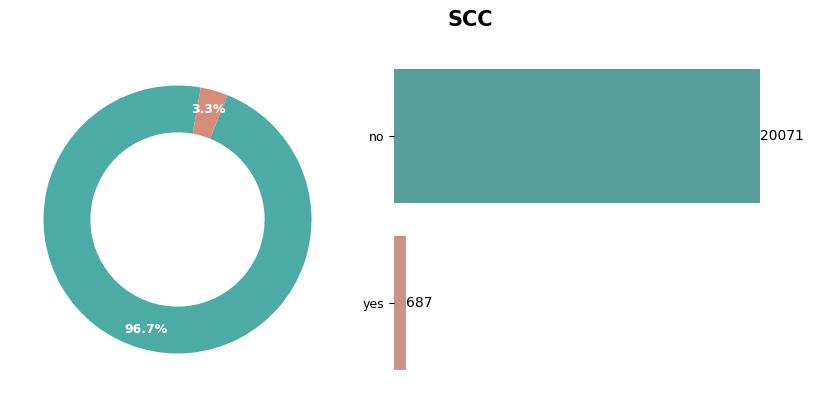

In [39]:
showplot("SCC")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


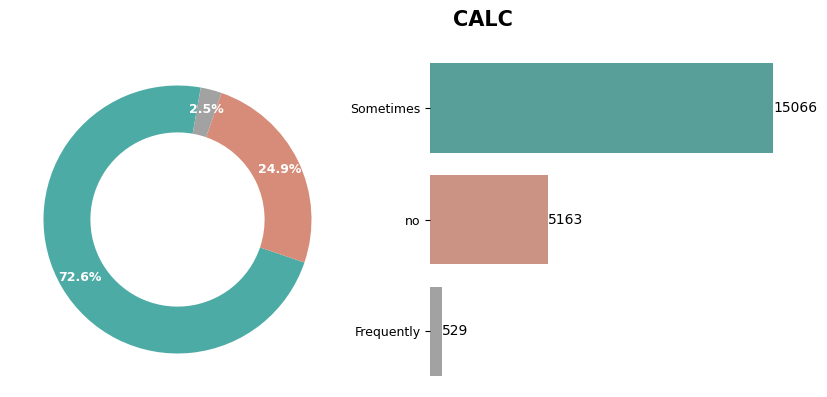

In [40]:
showplot("CALC")

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
<ipython-input-24-2cba04ef2628>:19: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


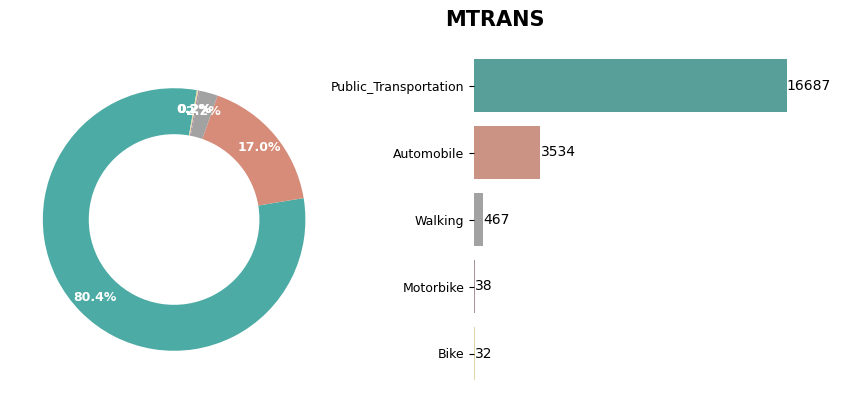

In [41]:
showplot("MTRANS")

In [49]:
# Checking for distributions
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
def dist(train_dataset,columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(24, 10))
    plt.suptitle('Distribution for numerical features: Train vs Original Dataset', fontsize=16, fontweight='bold')
    axs = axs.flatten()

    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#05b0a3', label='Train')
        # sns.kdeplot(original_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#d68c78', label='Original')
        # axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}\n Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].legend()

    plt.tight_layout()

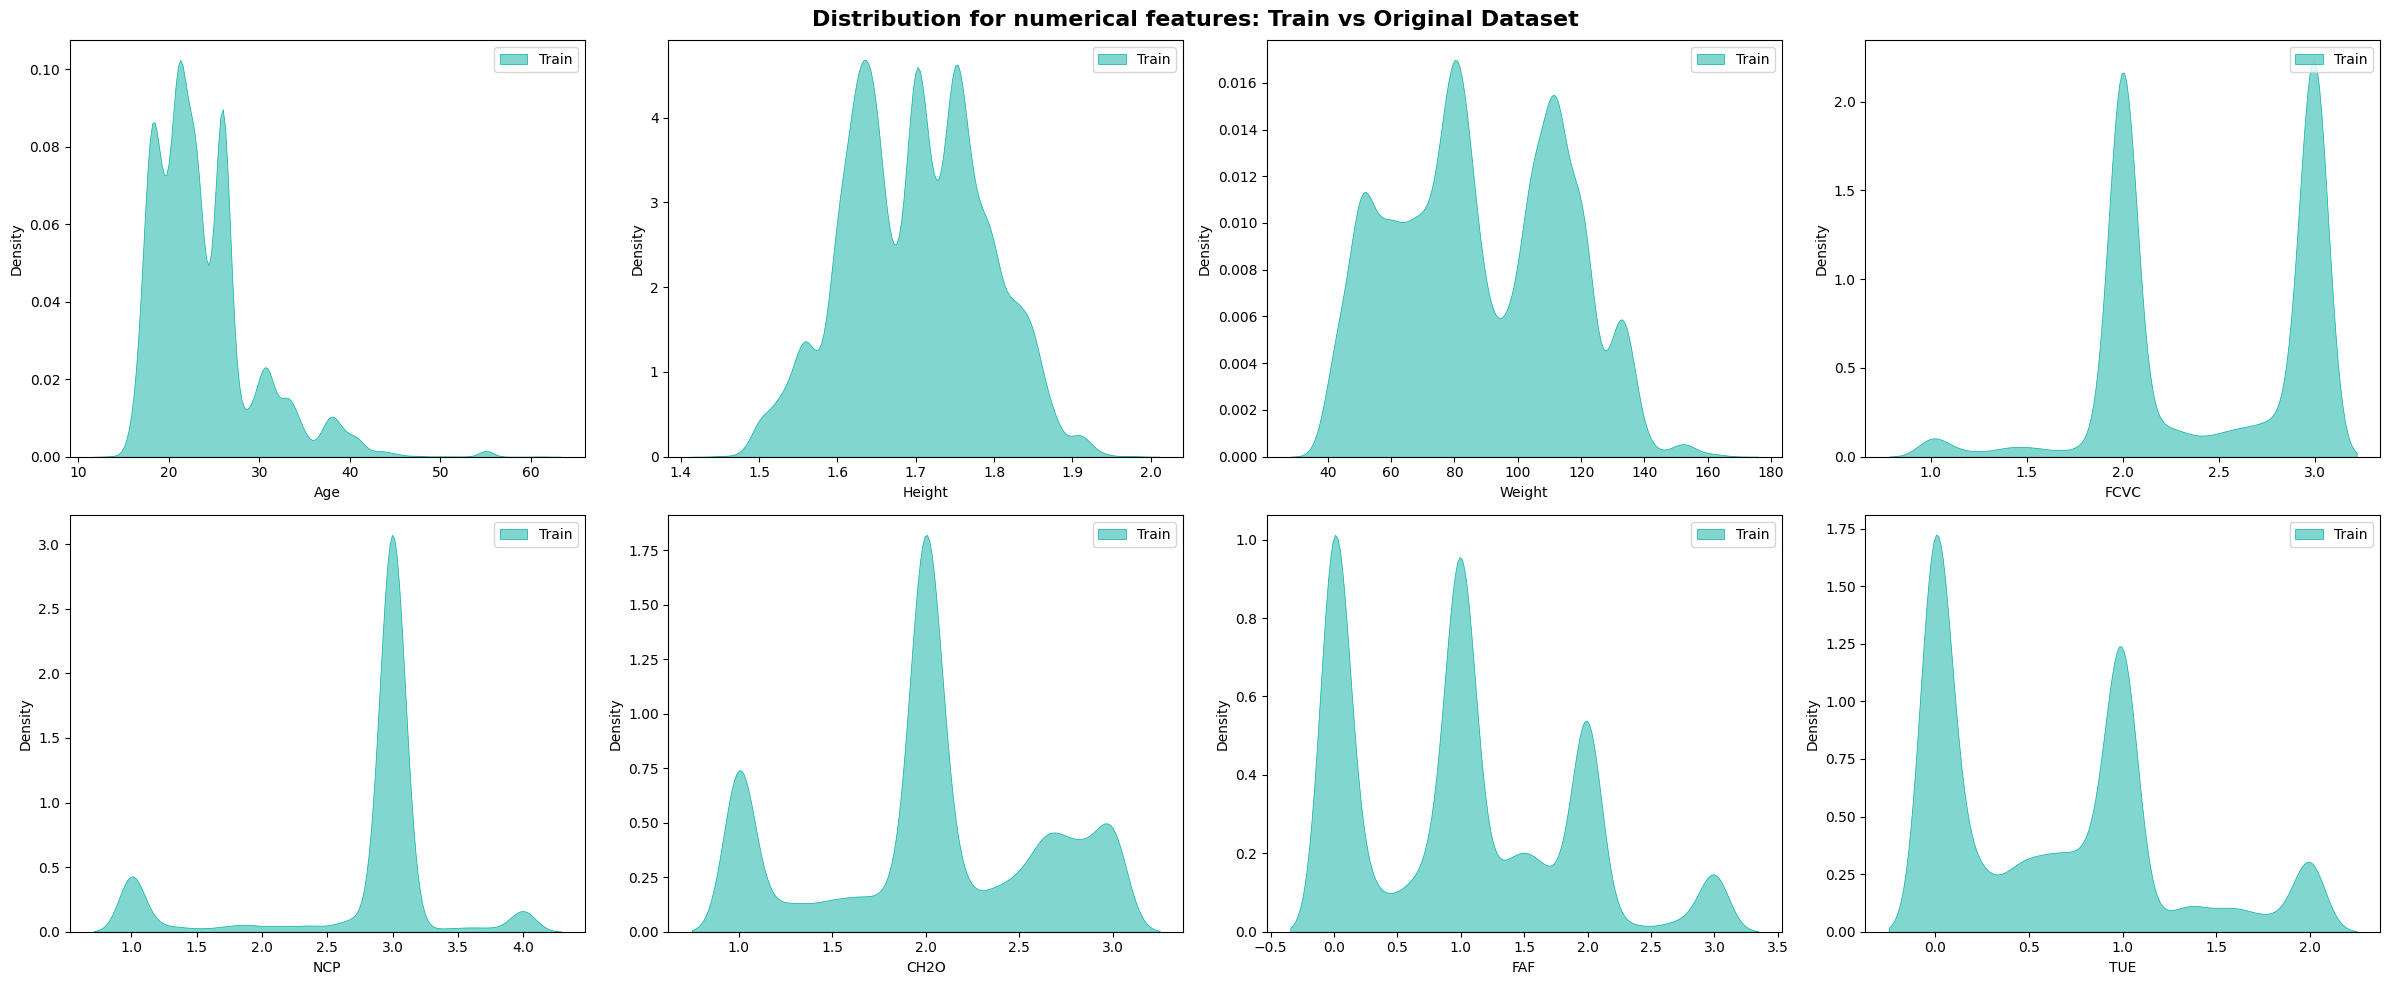

In [50]:
dist(train_dataset=df_train, columns_list=numeric_columns.columns, rows=2, cols=4)

<ipython-input-51-d6200db912a0>:3: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax1 = sns.scatterplot(x=df_train['Height'], y=df_train['Age'], hue="NObeyesdad",
<ipython-input-51-d6200db912a0>:6: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax2 = sns.scatterplot(x=df_train['Height'], y=df_train['Weight'], hue="NObeyesdad",
<ipython-input-51-d6200db912a0>:9: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax3 = sns.scatterplot(x=df_train['Age'], y=df_train['Weight'], hue="NObeyesdad",


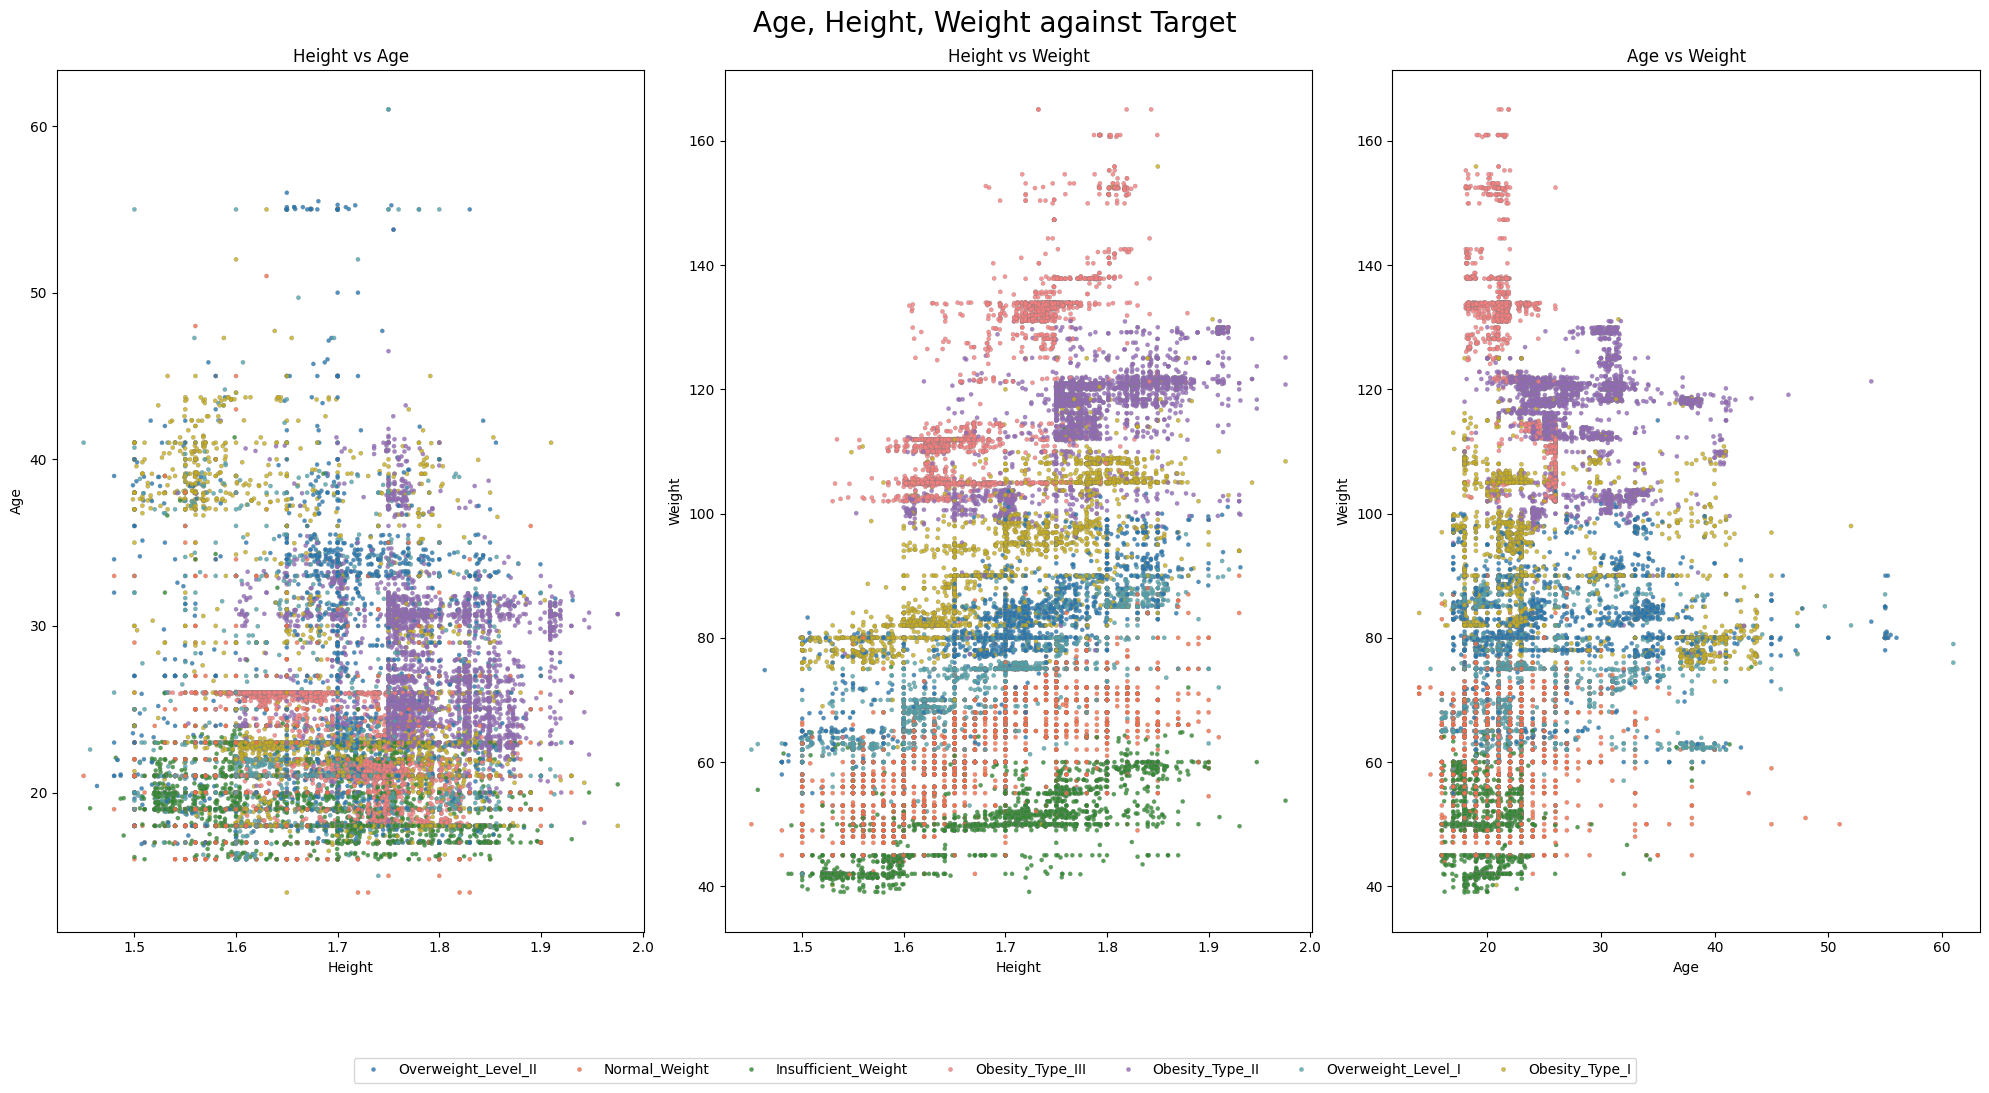

In [51]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(x=df_train['Height'], y=df_train['Age'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[0])
axes[0].set_title('Height vs Age')
ax2 = sns.scatterplot(x=df_train['Height'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[1])
axes[1].set_title('Height vs Weight')
ax3 = sns.scatterplot(x=df_train['Age'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[2])
axes[2].set_title('Age vs Weight')
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_train['NObeyesdad'].unique()),
           title='')
fig.suptitle('Age, Height, Weight against Target', fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

<ipython-input-53-c71ab3c3ac5a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-53-c71ab3c3ac5a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-53-c71ab3c3ac5a>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-53-c71ab3c3ac5a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

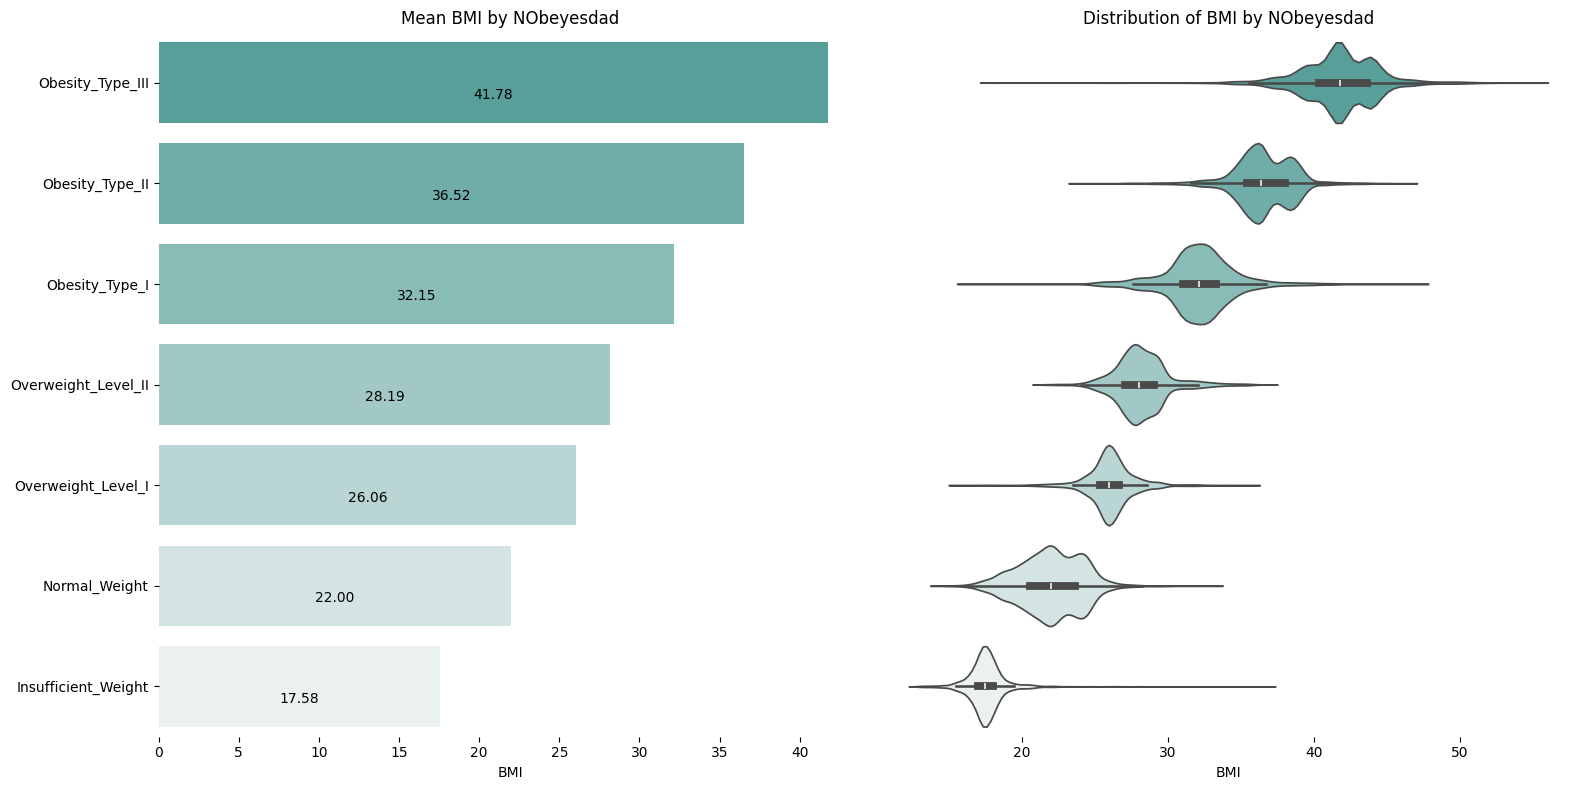

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by NObeyesdad')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

In [54]:
df_train.groupby('NObeyesdad')['BMI'].describe().reset_index().style.background_gradient()

,NObeyesdad,count,mean,std,min,25%,50%,75%,max
0,Insufficient_Weight,2523.000000,17.583619,1.388408,12.868541,17.025801,17.506390,18.025957,36.778115
1,Normal_Weight,3082.000000,22.000999,2.194097,14.631670,20.568937,22.038567,23.661439,32.882414
2,Obesity_Type_I,2910.000000,32.154649,2.513458,16.597443,31.020408,32.121386,33.298647,46.805188
3,Obesity_Type_II,3248.000000,36.521958,2.112538,24.048460,35.436970,36.378753,38.023475,46.222483
4,Obesity_Type_III,4046.000000,41.781745,2.670789,18.178670,40.371119,41.750620,43.615233,54.997991
5,Overweight_Level_I,2427.000000,26.059270,1.768697,15.761880,25.390625,25.963757,26.672763,35.555556
6,Overweight_Level_II,2522.000000,28.192491,1.835666,21.513859,27.080170,28.020083,29.086346,36.741456


<ipython-input-55-5bb213ff3b64>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-55-5bb213ff3b64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-55-5bb213ff3b64>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-55-5bb213ff3b64>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

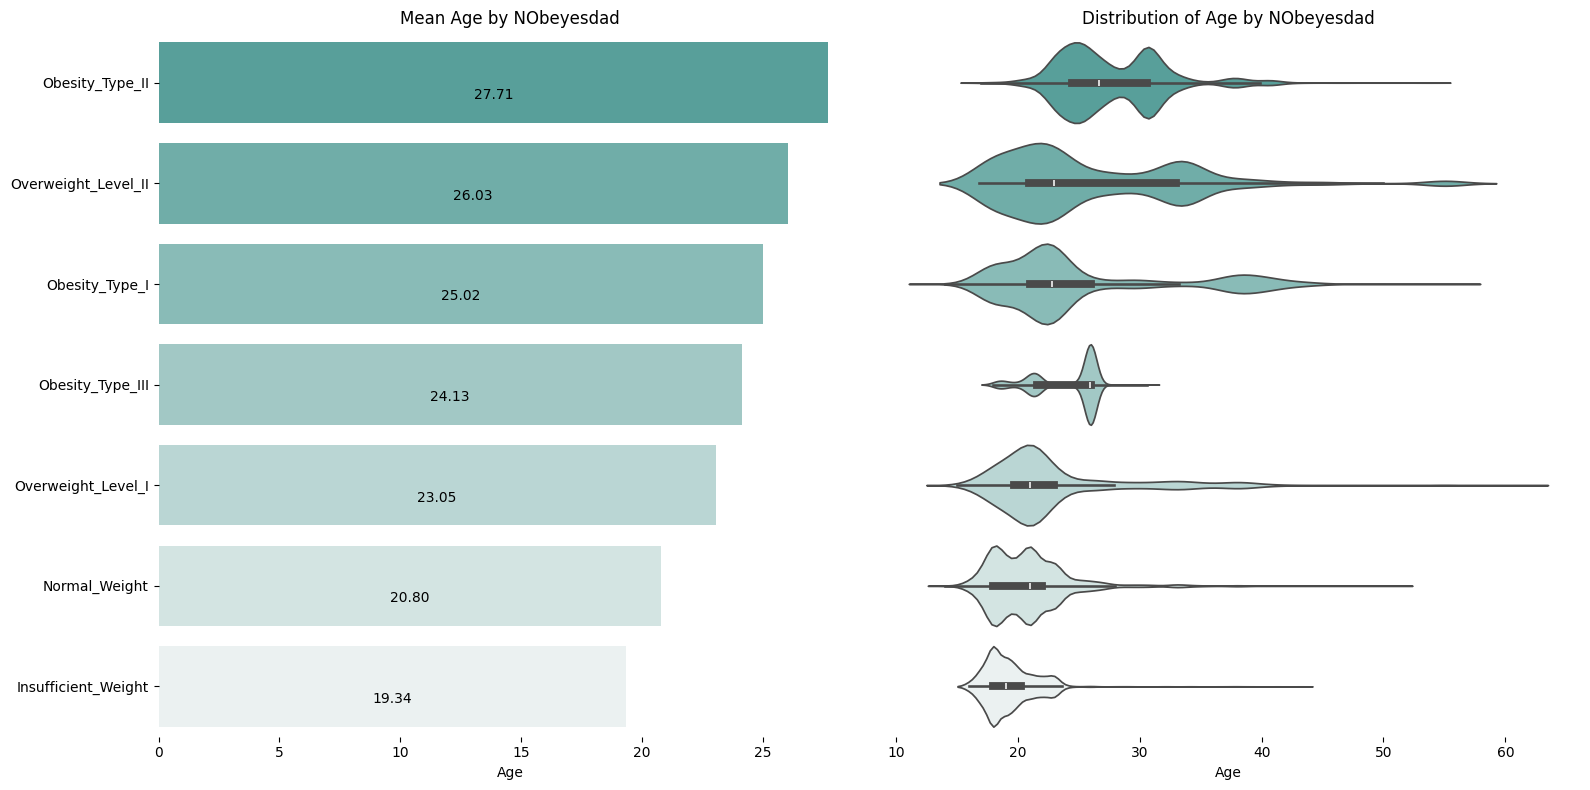

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index
sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean Age by NObeyesdad')
ax1.set_xlabel('Age')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of Age by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

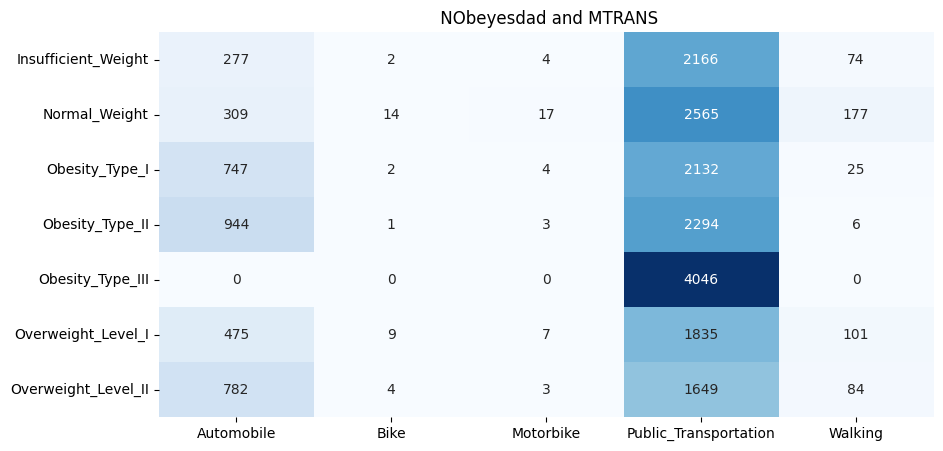

In [56]:
cross_tab = pd.crosstab(df_train['NObeyesdad'], df_train['MTRANS'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' NObeyesdad and MTRANS')
plt.xlabel('')
plt.ylabel('')
plt.show()

<ipython-input-57-210f23b8a369>:2: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax = sns.countplot(x='Gender', hue='NObeyesdad', data=df_train, palette=colors, dodge=True)


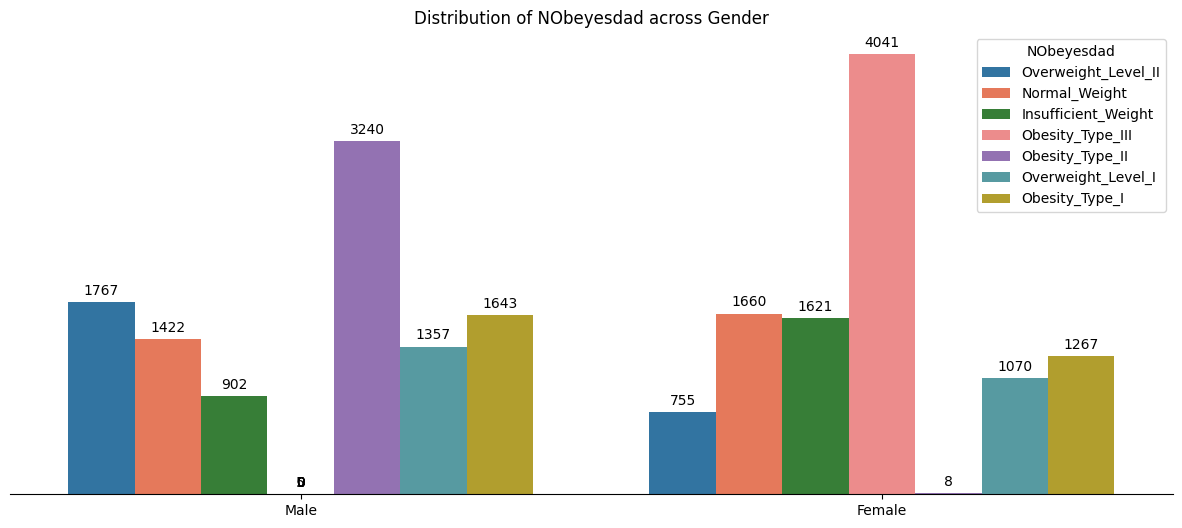

In [57]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=df_train, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

<ipython-input-58-7015122b5ba6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-58-7015122b5ba6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-58-7015122b5ba6>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
<ipython-input-58-7015122b5ba6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

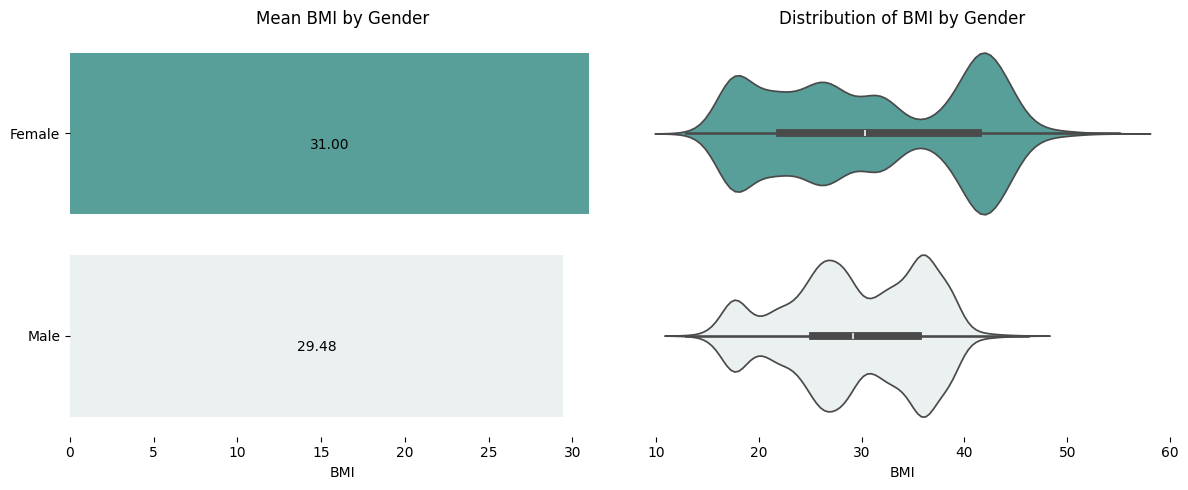

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('Gender')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 50), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by Gender')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)
# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by Gender')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

In [70]:
# #Correlation heatmap
# numeric_columns_original = original.select_dtypes(include=np.number)
# numeric_columns_train = df_train.select_dtypes(include=np.number).drop(['id','BMI'], axis=1)
# # original
# corr_original = numeric_columns_original.corr(method='pearson')
# mask_original = np.triu(np.ones_like(corr_original))
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# sns.heatmap(corr_original, annot=True, fmt='.2f', mask=mask_original, cmap='copper_r', cbar=None, linewidth=2, ax=axes[0])
# axes[0].set_title('Original Dataset', fontsize=16, fontweight='bold')

# # Train
# corr_train = numeric_columns_train.corr(method='pearson')
# mask_train = np.triu(np.ones_like(corr_train))
# sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='copper_r', cbar=None, linewidth=2, ax=axes[1])
# axes[1].set_title('Train Dataset', fontsize=16, fontweight='bold')
# plt.tight_layout()
# plt.show()

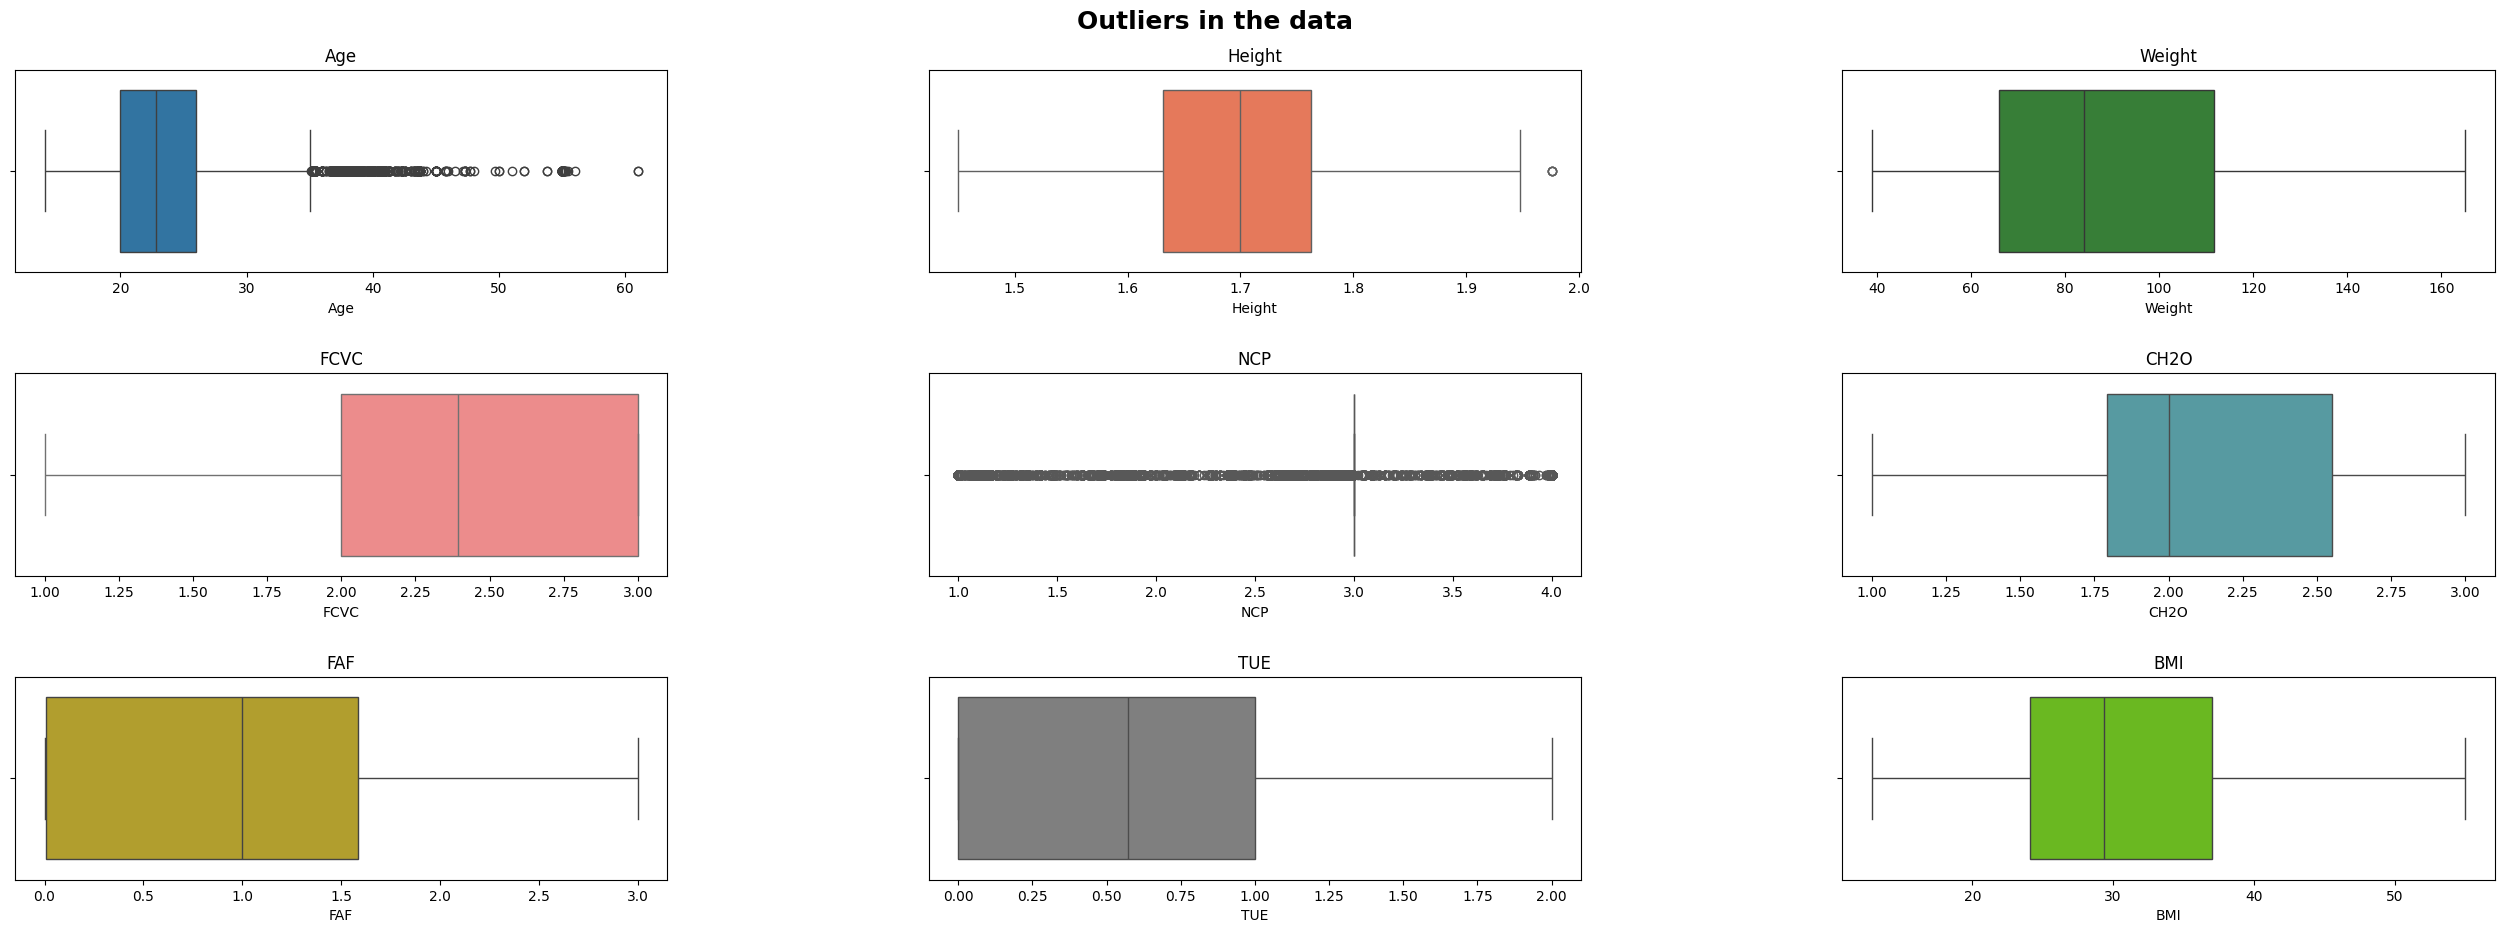

In [60]:
#Check for presence of outliers in each feature
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = df_train, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

In [61]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train)
categorical_vars.remove('NObeyesdad')

In [63]:
train = df_train.drop(['id'], axis=1).drop_duplicates()
test = df_test.drop(['id'], axis=1)

In [64]:
train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)
test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)

In [65]:
#Let's check the Shape of data
print(f'The encoded Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The encoded Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The encoded Train dataset has 20758 rows and 24 columns
The encoded Test dataset has 13840 rows and 23 columns


In [66]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [67]:
X.shape

(20758, 23)

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
to_cat = df_train.loc[:, df_train.nunique() < 8].columns
df_train[to_cat] = df_train[to_cat].astype("category").copy()
df_train.dtypes

id                                   int64
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
BMI                                float64
dtype: object